In [33]:
from pybit.unified_trading import HTTP
import pandas as pd
import pandas_ta as ta
import numpy as np
from time import sleep
from asdf import (
    get_dataframe,
    get_full_dataframe,
    get_signal_for_candle,
    SignalType,
    Signal,
)
from decouple import config
import matplotlib.pyplot as plt


API_KEY = config("API_KEY")
SECRET_KEY = config("SECRET_KEY")


session = HTTP()
position_opened = False

df = get_dataframe(session, "APTUSDT", 720, 1000)
df = get_full_dataframe(df)

signals: [Signal] = []

for i in range(0, len(df.index) - 2):
    signal: Signal = get_signal_for_candle(df, i, position_opened)
    if signal.type == SignalType.BUY:
        print(signal)
        signals.append(signal)
        position_opened = True
    elif signal.type == SignalType.SELL:
        print(signal)
        signals.append(signal)
        position_opened = False
    else:
        pass

Time: 1676419200000, type: SignalType.BUY, entry: 14.4215, tp: 15.86365, sl: 13.700425
Time: 1677628800000, type: SignalType.BUY, entry: 13.2625, tp: 14.58875, sl: 12.599374999999998
Time: 1678363200000, type: SignalType.BUY, entry: 11.1115, tp: 12.22265, sl: 10.555925
Time: 1678579200000, type: SignalType.BUY, entry: 10.33, tp: 11.363, sl: 9.8135
Time: 1680393600000, type: SignalType.BUY, entry: 12.228, tp: 13.4508, sl: 11.6166
Time: 1681128000000, type: SignalType.BUY, entry: 11.4495, tp: 12.59445, sl: 10.877025
Time: 1701475200000, type: SignalType.BUY, entry: 7.217, tp: 7.9387, sl: 6.8561499999999995
Time: 1704974400000, type: SignalType.BUY, entry: 9.4505, tp: 10.39555, sl: 8.977975
Time: 1706140800000, type: SignalType.BUY, entry: 8.428, tp: 9.270800000000001, sl: 8.0066
Time: 1707480000000, type: SignalType.BUY, entry: 9.093, tp: 10.0023, sl: 8.638349999999999


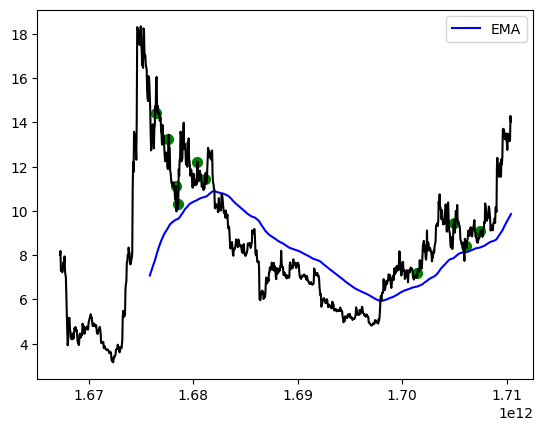

In [34]:
# plt.plot(df["MACDs_12_26_9"], label="signal", color="red")
plt.plot(df["EMA200"], label="EMA", color="blue")
plt.plot(df['close'], color='black')
for signal in signals:
    if signal.type == SignalType.BUY:
        plt.scatter(signal.time, signal.entry_point, color='green', s=50, marker='o')
    else:
        plt.scatter(signal.time, signal.entry_point, color='red', s=50, marker='o')
plt.legend()
plt.show()

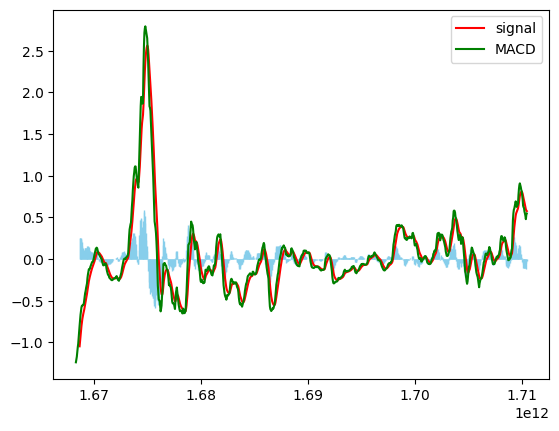

In [35]:
plt.plot(df['MACDs_12_26_9'], label='signal', color='red')
plt.plot(df['MACD_12_26_9'], label='MACD', color='green')
# plt.plot(df['MACDh_12_26_9'], label='histogram', color='blue')
plt.bar(df.index, df['MACDh_12_26_9'], color='skyblue', edgecolor='skyblue')
plt.legend()
plt.show()